In [ ]:
#%%writefile squaregraphs.py

import numpy.random as r
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

# Ufunc are a way to vectorize python functions so that they execute efficiently on numpy arrays.
def _diff(x,y):
    return (x-y)**2

ufunc_diff = np.frompyfunc(_diff,2,1)
ufunc_sqrt=np.frompyfunc(lambda a:np.sqrt(a),1,1)

def unifSquare(n=1000):
    """Generate a uniform sample from the square"""
    X=r.uniform(size=[n,2])
    return X

def squareNet(n=100,epsilon=0.1):
    """Generate an epsilon net that covers all but about 1/n of the square"""
    X=r.uniform(size=[1,2])
    while True:
        Z=r.uniform(size=[n,2])
        D1=ufunc_diff.outer(X[:,0],Z[:,0])
        D2=ufunc_diff.outer(X[:,1],Z[:,1])
        D=D1+D2
        _Dist=ufunc_sqrt(D) # compute matrix where entry i,j is the distance between center i and candidate j
        #print(_Dist.shape)
        min_dist=np.min(_Dist,axis=0)  # compute distance of each candidate to nearest center in X
        #print(min_dist.shape)
        d_max=np.max(min_dist)
        print('\r centers=%d, d_max= %5.3f, epsilon=%5.3f'%(X.shape[0],d_max,epsilon),end='')
        if d_max<epsilon:
            break
        else:
            i_max=np.argmax(min_dist)
            X=np.append(X,Z[i_max:i_max+1,:],axis=0) # accumulate furthest center
    return X

def Compute_edges(X,max_dist=0.2):
    """Compute the edges whose length is smaller than max_dist"""

    D1=ufunc_diff.outer(X[:,0],X[:,0])
    D2=ufunc_diff.outer(X[:,1],X[:,1])
    D=D1+D2
    _Dist=ufunc_sqrt(D)
    _Small = _Dist<max_dist

    pairs=np.nonzero(_Small)

    segments=[]
    for i in range(len(pairs[0])):
        c0=pairs[0][i]
        c1=pairs[1][i]
        if c0>c1:
            segment=[tuple(X[c0,:]),tuple(X[c1,:])]
            segments.append(segment)
    return segments

def plot_graph(X,segments):
    lc = mc.LineCollection(segments, colors='r', linewidths=0.1)
    fig, ax = pl.subplots(figsize=[12,12])
    ax.plot(X[:,0],X[:,1],'.');
    ax.add_collection(lc)
    ax.autoscale()
    

X=squareNet(epsilon=0.05)

#X=unifSquare(n=200)

segments=Compute_edges(X,max_dist=0.1)

In [8]:
segments[:3]

[[(0.12691331748489965, 0.3378777860967179),
  (0.0321760155556341, 0.33163104594591475)],
 [(0.12691331748489965, 0.3378777860967179),
  (0.22174129618131477, 0.3284938592701998)],
 [(0.8099352337552893, 0.3152281237199015),
  (0.7161217804553194, 0.30384546287671343)]]

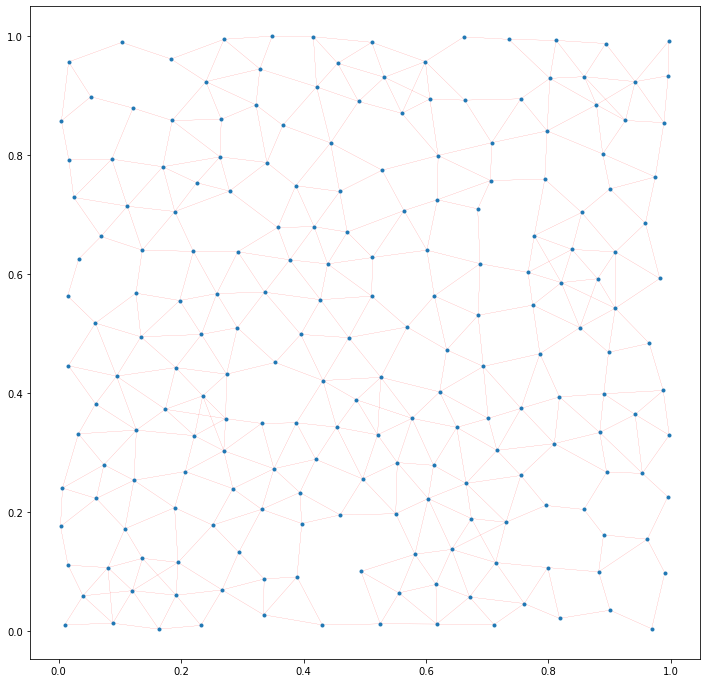

In [6]:
plot_graph(X,segments)

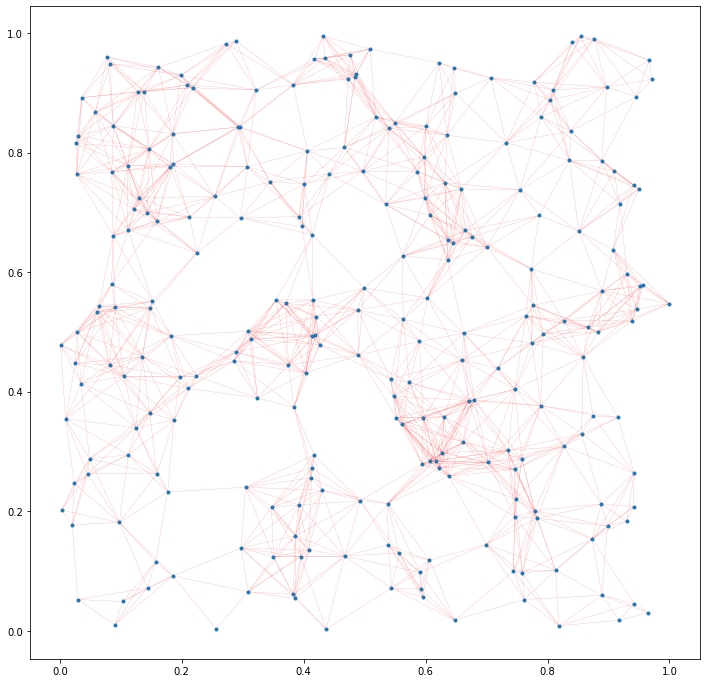

In [4]:
X=unifSquare(n=250)

segments=Compute_edges(X,max_dist=0.13)
plot_graph(X,segments)

In [ ]:
segments=Compute_edges(X,max_dist=0.2)
plot_graph(X,segments)

In [ ]:
segments=Compute_edges(X,max_dist=0.3)
plot_graph(X,segments)